Transforming variables in linear regression modeling is a common technique that can be used **to improve the model's fit to the data, meet the assumptions of linear regression, and make the model's coefficients more interpretable.**

There are a number of <u>different reasons why it may be necessary to transform variables</u>, including:

- To achieve linearity: If the relationship between the independent and dependent variables is not linear, transforming the variables can make it more linear. This will improve the fit of the model and make the results more accurate.

- To achieve normality: The assumption of normality of the residuals is important for linear regression models. Transforming the variables can help to achieve normality, which will improve the reliability of the model's results.

- To stabilize the variance: The assumption of homoscedasticity, or equal variance of the residuals, is also important for linear regression models. Transforming the variables can help to stabilize the variance, which will improve the reliability of the model's results.

- To make the coefficients more interpretable: Sometimes, transforming the variables can make the coefficients of the model more interpretable. For example, if the dependent variable is in logarithmic scale, the coefficients can be interpreted as elasticities.


There are many <u>different types of variable transformations</u> that can be used in linear regression modeling, including:

- Log transformation: This transformation is often used for variables that are skewed or have a wide range of values. It can help to make the distribution of the variable more normal and reduce the influence of outliers. For example, you might log-transform a variable like income or house price.

- Square root transformation: This transformation is often used for variables that are non-negative and have a wide range of values. It can help to make the relationship between the variable and the dependent variable more linear. Varibales that are right skewed can often benefit from a square root transformation.

- Reciprocal transformation: This transformation is often used for variables that are positive and have a wide range of values. It can help to make the relationship between the variable and the dependent variable more linear.

- Polynomial transformation: This transformation can be used to create new variables that represent the nonlinear relationship between the independent variable and the dependent variable. For example, you might use a polynomial transformation to model the relationship between age and income.

- Standardization: This transformation subtracts the mean and divides by the standard deviation of the variable. It can help to make the variables on a common scale and reduce the influence of outliers.

*It is important to note that transforming variables can change the interpretation of the model's coefficients. For example, if you log-transform a variable, the coefficient for that variable will represent the percentage change in the dependent variable for a one-unit increase in the log of the independent variable.*

Here are <u>some tips for transforming variables in linear regression modeling</u>:

- Start by inspecting the data: Look at the distributions of the independent and dependent variables to see if there are any obvious problems, such as skewness or outliers. If you see any problems, consider transforming the variables.

- Plot the data: Before transforming any variables, it is important to plot the data to get a sense of the relationships between the variables. This can help you to identify which variables might need to be transformed.

- Consider the model's assumptions: When choosing a transformation, it is important to consider the assumptions of the linear regression model. For example, if you are transforming the dependent variable, you need to make sure that the transformed variable is still normally distributed.

- Try different transformations: There is no one-size-fits-all approach to transforming variables. It is often helpful to try different transformations to see which one works best for your data.

- Interpret the coefficients carefully: After transforming variables, it is important to interpret the model's coefficients carefully. Remember that the coefficients for transformed variables will represent different things than the coefficients for untransformed variables.

- Evaluate the results: Once you have transformed the variables, fit the model and evaluate the results. Look at the R-squared value, the p-values of the coefficients, and the normality of the residuals. If the results are satisfactory, then you can use the transformed variables in your model.

**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
  - [Loading the Dataset](#toc1_2_)    
  - [Initial exploration](#toc1_3_)    
  - [Exploring the relationship between the "Distance to nearest MRT (m)" and the "Price TWD msq)"](#toc1_4_)    
      - [-> Let's plot a linear regression plot](#toc1_4_1_1_)    
      - [-> Initial haunch is that transforming the explanatory variable will result in a linear relationship between the explanatory variable and the response variable](#toc1_4_1_2_)    
  - [Transformation of response variable is also possible](#toc1_5_)    
      - [-> Trying out quadratic root transformation](#toc1_5_1_1_)    
      - [-> Trying out log transformation](#toc1_5_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import statsmodels.formula.api as smf

### <a id='toc1_2_'></a>[Loading the Dataset](#toc0_)

- Taiwan real estate dataset contains the following columns--
  - dist_to_mrt_station_m: Distance to nearest MRT metro station, in meters.
  - n_convenience: No. of convenience stores in walking distance.
  - house_age_years: The age of the house, in years, in three groups.
  - price_twd_msq: House price per unit area, in New Taiwan dollars per meter squared.

In [4]:
taiwan_real_estate = pd.read_csv("./datasets/taiwan_real_estate2.csv")

### <a id='toc1_3_'></a>[Initial exploration](#toc0_)

In [5]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [6]:
taiwan_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dist_to_mrt_m    414 non-null    float64
 1   n_convenience    414 non-null    int64  
 2   house_age_years  414 non-null    object 
 3   price_twd_msq    414 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB


### <a id='toc1_4_'></a>[Exploring the relationship between the "Distance to nearest MRT (m)" and the "Price TWD msq)"](#toc0_)

##### <a id='toc1_4_1_1_'></a>[-> Let's plot a linear regression plot](#toc0_)

<Axes: xlabel='dist_to_mrt_m', ylabel='price_twd_msq'>

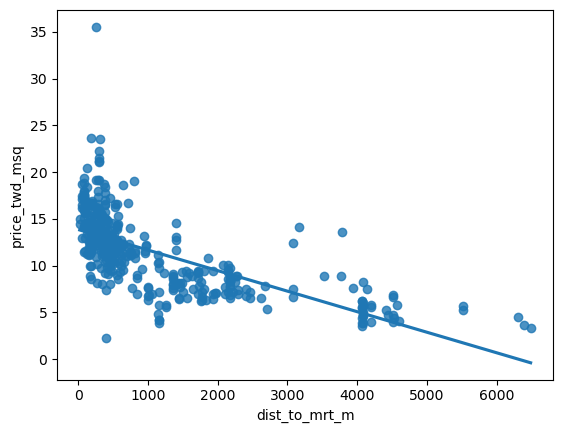

In [7]:
sns.regplot(data=taiwan_real_estate, x="dist_to_mrt_m", y="price_twd_msq", ci=None)

There are some problems that we notice at first glance.

- The relationship between the variables is not exactly linear.
- The data points are clustered at the lower end of the x-axis and towards the middle of the y-axis.

##### <a id='toc1_4_1_2_'></a>[-> Initial haunch is that transforming the explanatory variable will result in a linear relationship between the explanatory variable and the response variable](#toc0_)

In [8]:
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

<Axes: xlabel='sqrt_dist_to_mrt_m', ylabel='price_twd_msq'>

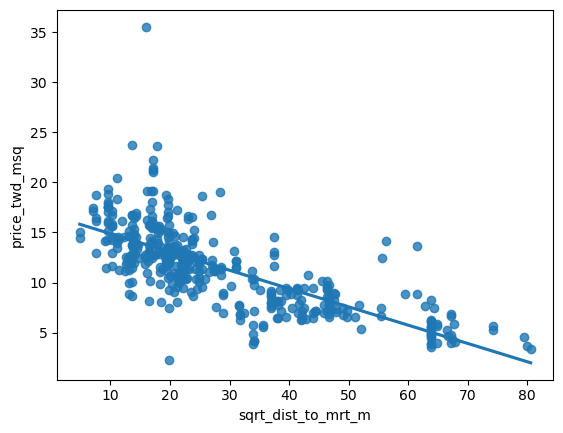

In [9]:
sns.regplot(data=taiwan_real_estate, x="sqrt_dist_to_mrt_m", y="price_twd_msq", ci=None)

In [10]:
# a linear regression model of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = smf.ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

In [11]:
# use this explanatory data for prediction using the fitted model
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# prediction
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

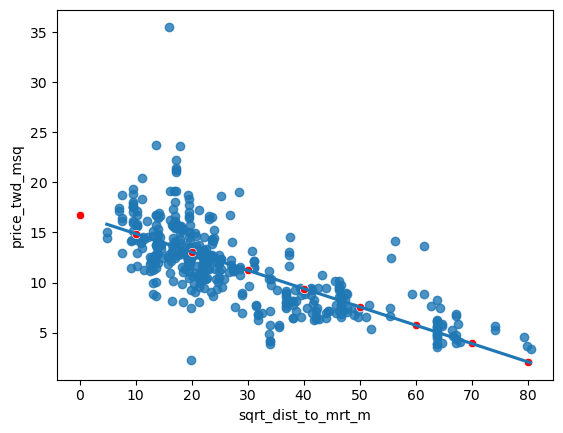

In [12]:
# visualization
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# adding a layer of prediction points
sns.scatterplot(data=prediction_data, x="sqrt_dist_to_mrt_m", y="price_twd_msq", color="red")
plt.show()

By transforming the explanatory variable, the relationship with the response variable became linear, and so a linear regression became an appropriate model.

### <a id='toc1_5_'></a>[Transformation of response variable is also possible](#toc0_)

In [13]:
ad_conversion = pd.read_csv("./datasets/ad_conversion.csv")

In [14]:
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


<Axes: xlabel='n_impressions', ylabel='n_clicks'>

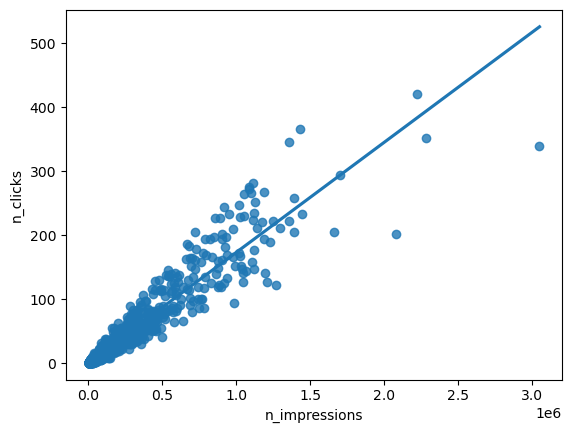

In [15]:
sns.regplot(data=ad_conversion, x="n_impressions", y="n_clicks", ci=None)

The regression plot is congested at the lower end of the figure. As the points moves outward from the lower end, the points become more scattered. This is an indication that the variance of the response variable is not constant. This is a violation of the assumption of homoscedasticity. 

- Notice that the "n_impressions" variable is represented as multiples of millions (i.e, 1.5e+06). This is a very large range of values. We can transform the response variable by taking the log of the variable. This will reduce the range of values and can make the variance more constant.
- We can also try a quadratic root transformation. This will reduce the range of values and may make the variance more constant.

##### <a id='toc1_5_1_1_'></a>[-> Trying out quadratic root transformation](#toc0_)

In [16]:
ad_conversion["qdrt_n_impressions"] = (ad_conversion["n_impressions"]) ** 0.25

<Axes: xlabel='qdrt_n_impressions', ylabel='n_clicks'>

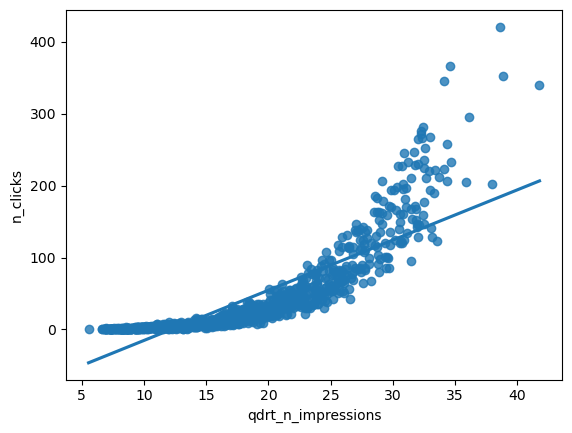

In [17]:
sns.regplot(data=ad_conversion, x="qdrt_n_impressions", y="n_clicks", ci=None)

That's not quite right. Let's see by transforming both the explanatory and response variables.

In [18]:
ad_conversion["qdrt_n_clicks"] = (ad_conversion["n_clicks"]) ** 0.25

<Axes: xlabel='qdrt_n_impressions', ylabel='qdrt_n_clicks'>

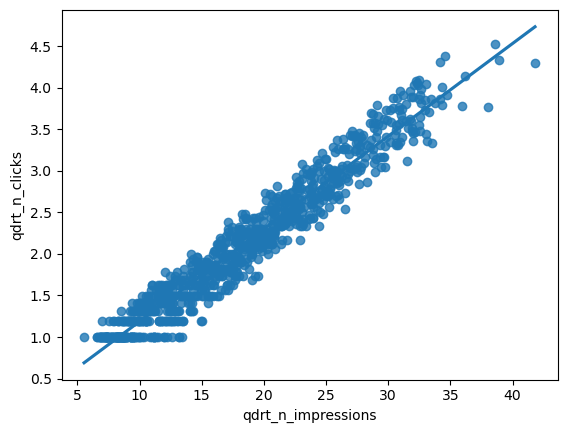

In [19]:
sns.regplot(data=ad_conversion, x="qdrt_n_impressions", y="qdrt_n_clicks", ci=None)

That's better. Let's try to fit a model and see how it performs.

In [20]:
mdl_click_vs_impression_qdrt = smf.ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

In [21]:
# made up explanatory data for prediction
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# making predictions and creating a dataframe of prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression_qdrt.predict(explanatory_data)
)

In [22]:
# printing the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


In [23]:
# back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


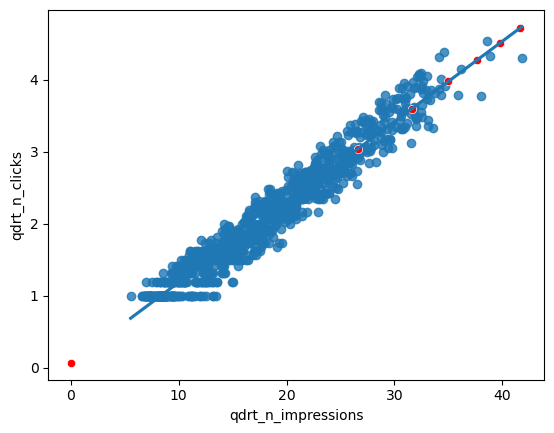

In [24]:
# plotting the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# adding a layer of the prediction points
sns.scatterplot(data=prediction_data, x="qdrt_n_impressions", y="qdrt_n_clicks", color="red")
plt.show()

##### <a id='toc1_5_1_2_'></a>[-> Trying out log transformation](#toc0_)

In [25]:
ad_conversion["log_n_impressions"] = np.log(ad_conversion["n_impressions"])

<Axes: xlabel='log_n_impressions', ylabel='n_clicks'>

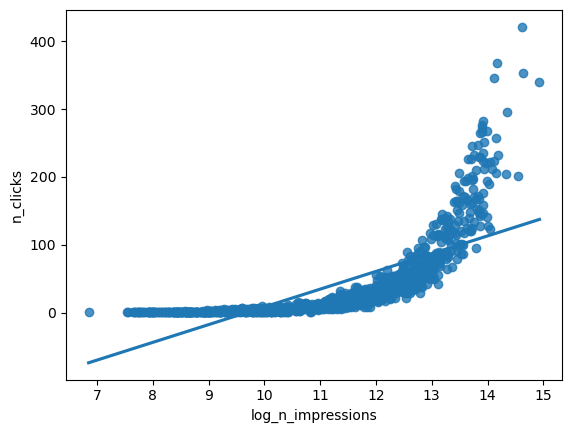

In [26]:
sns.regplot(data=ad_conversion, x="log_n_impressions", y="n_clicks", ci=None)

That's not quite right. Let's see by transforming both the explanatory and response variables.

In [27]:
ad_conversion["log_n_clicks"] = np.log(ad_conversion["n_clicks"])

<Axes: xlabel='log_n_impressions', ylabel='log_n_clicks'>

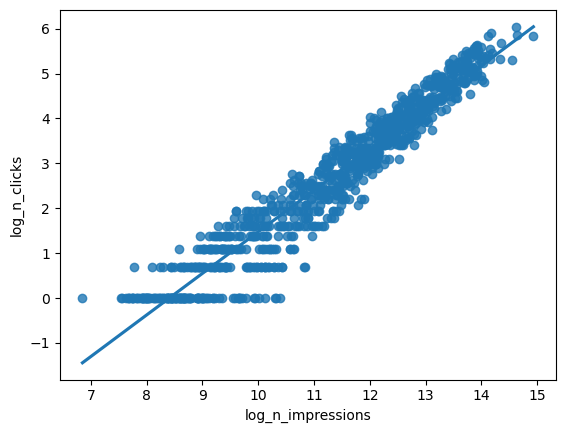

In [28]:
sns.regplot(data=ad_conversion, x="log_n_impressions", y="log_n_clicks", ci=None)

That's better. Let's try to fit a model and see how it performs.

In [29]:
mdl_click_vs_impression_log = smf.ols("np.log(n_clicks) ~ np.log(n_impressions)", data=ad_conversion).fit()

Writing the formula this way will transform the explanatory variable and the response variable with the `np.log()` function without the need to create new variables in the dataframe.

In [30]:
# made up explanatory data for prediction
explanatory_data = pd.DataFrame({"n_impressions": np.arange(0, 3e6+1, 5e5)})

# making predictions and creating a dataframe of prediction_data
prediction_data = explanatory_data.assign(
    n_clicks = mdl_click_vs_impression_log.predict(explanatory_data, transform=True)
)

This is a convenient way to transform variables in a linear regression model. One disadvantage is that you would still need to do back-transformation to interpret the coefficients in their original scale and also for plotting the prediction data layered over the original data. 

In [31]:
# printing the result
print(prediction_data)

   n_impressions  n_clicks
0            0.0      -inf
1       500000.0  4.367541
2      1000000.0  5.009737
3      1500000.0  5.385398
4      2000000.0  5.651933
5      2500000.0  5.858674
6      3000000.0  6.027594
